<a href="https://colab.research.google.com/github/coutnick/C964-Capstone/blob/main/C964_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score


In [196]:
url = "https://github.com/coutnick/C964-Capstone/raw/main/Housing.csv"

In [197]:
# upload the csv
df = pd.read_csv(url)

In [198]:
# display the table
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [199]:
# Analyze the data
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [200]:
#Check for null values
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [201]:
modified_df = df.drop(columns=['guestroom', 'hotwaterheating', 'furnishingstatus'])

In [202]:
# Encode categorical data
encoded_df = pd.get_dummies(modified_df)

In [203]:
encoded_df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,basement_no,basement_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,2,False,True,True,False,False,True,False,True
1,12250000,8960,4,4,4,3,False,True,True,False,False,True,True,False
2,12250000,9960,3,2,2,2,False,True,False,True,True,False,False,True
3,12215000,7500,4,2,2,3,False,True,False,True,False,True,False,True
4,11410000,7420,4,1,2,2,False,True,False,True,False,True,True,False


<Axes: >

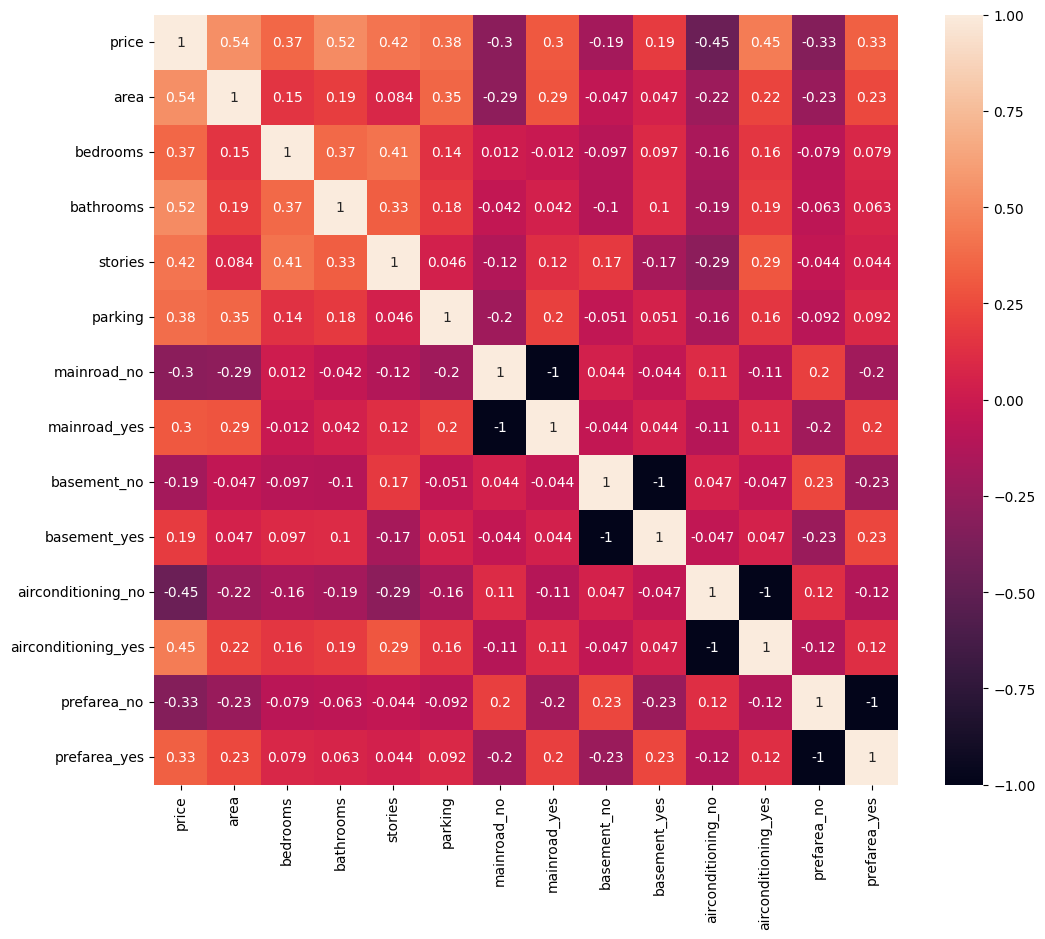

In [204]:
# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(encoded_df.corr(), annot=True)

<Axes: xlabel='area', ylabel='price'>

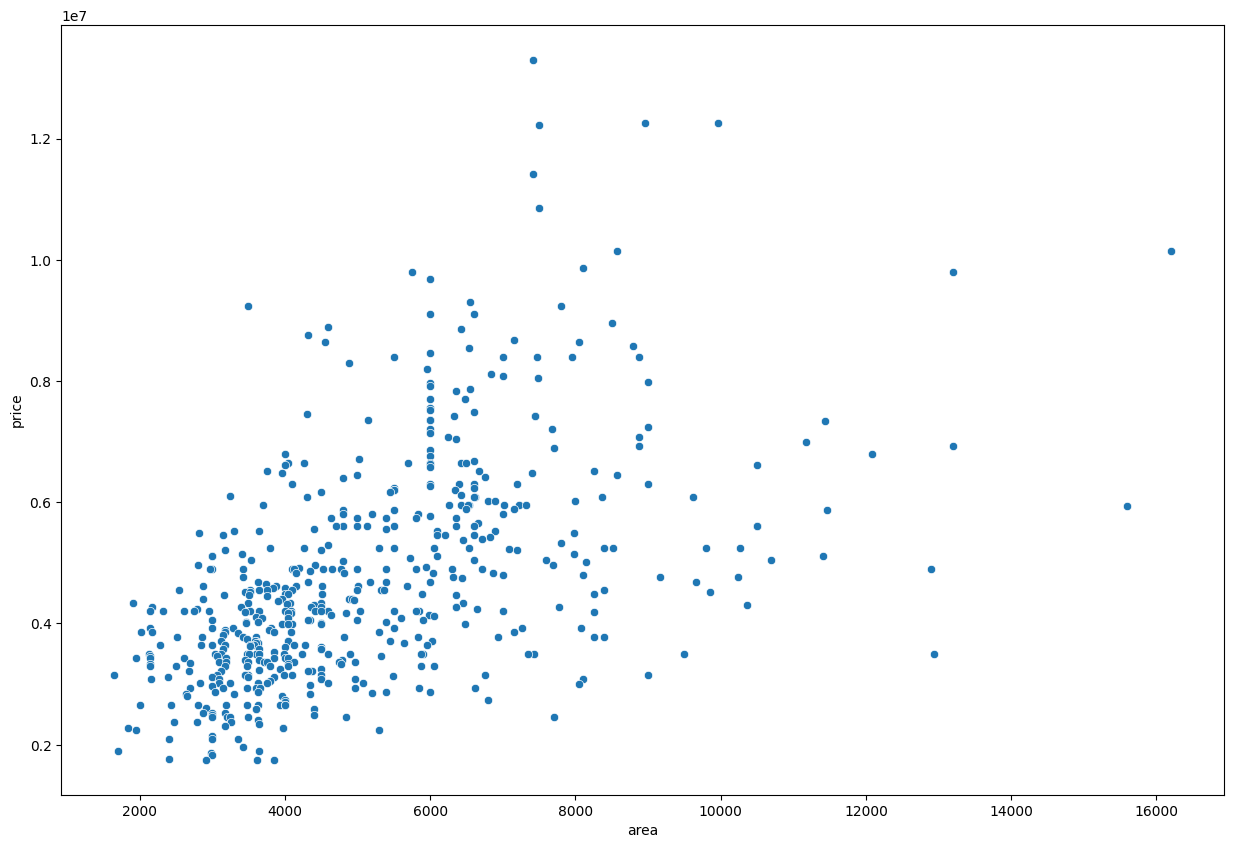

In [205]:
# Create a scatterplot to show the relationship between area and price
plt.figure(figsize=(15, 10))
sns.scatterplot(x='area', y='price', data=encoded_df)

<Axes: xlabel='bedrooms', ylabel='price'>

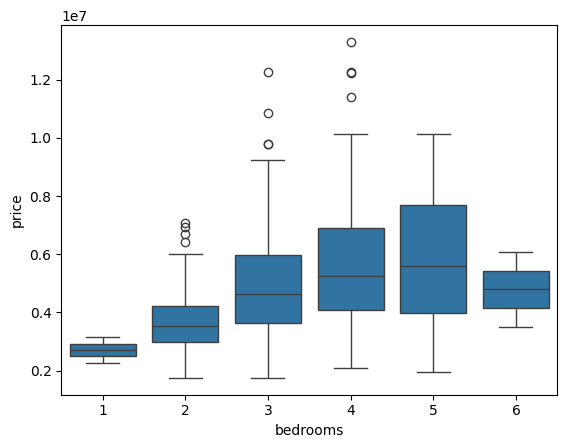

In [206]:
# boxplot
sns.boxplot(x='bedrooms', y='price', data=encoded_df)


In [207]:
# assign the dependent(X) and independent(y) variables
X = encoded_df.drop('price', axis=1)
y = encoded_df['price']

In [208]:
# Train the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)

In [209]:
# Create the random forest model
rf = RandomForestRegressor(random_state=49)

In [210]:
# Fit the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=49)

In [211]:
# Get y prediction
y_pred = rf.predict(X_test)

In [212]:
r2_score(y_test, y_pred)

0.6800207250749761

In [213]:
area_slider = widgets.FloatSlider(
    value=df['area'].mean(),
    min=df['area'].min(),
    max=df['area'].max(),
    step=0.01,
    description='Area:',
    disabled=False
)

bedroom_slider = widgets.IntSlider(
    value=df['bedrooms'].mean(),
    min=df['bedrooms'].min(),
    max=df['bedrooms'].max(),
    step=1,
    description='Bedrooms:',
    disabled=False
)

bathroom_slider = widgets.IntSlider(
    value=df['bathrooms'].mean(),
    min=df['bathrooms'].min(),
    max=df['bathrooms'].max(),
    step=1,
    description='Bathrooms:',
    disabled=False
)

parking_slider = widgets.IntSlider(
    value=df['parking'].mean(),
    min=df['parking'].min(),
    max=df['parking'].max(),
    step=1,
    description='Parking:',
    disabled=False
)



story_slider = widgets.IntSlider(
    value=df['stories'].mean(),
    min=df['stories'].min(),
    max=df['stories'].max(),
    step=1,
    description='Stories:',
    disabled=False
)

mainroad_dropdown = widgets.Dropdown(
    options=['yes', 'no'],
    value='yes',
    description='Main Road:',
    disabled=False
)

basement_dropdown = widgets.Dropdown(
    options=['yes', 'no'],
    value='yes',
    description='Basement:',
    disabled=False
)

air_conditioning_dropdown = widgets.Dropdown(
    options=['yes', 'no'],
    value='yes',
    description='Air Conditioning:',
    disabled=False
)

pref_area_dropdown = widgets.Dropdown(
    options=['yes', 'no'],
    value='yes',
    description='Preferred Area:',
    disabled=False
)

display(area_slider, bedroom_slider, bathroom_slider, parking_slider, story_slider, mainroad_dropdown, basement_dropdown, air_conditioning_dropdown, pref_area_dropdown)



FloatSlider(value=5150.54128440367, description='Area:', max=16200.0, min=1650.0, step=0.01)

IntSlider(value=2, description='Bedrooms:', max=6, min=1)

IntSlider(value=1, description='Bathrooms:', max=4, min=1)

IntSlider(value=0, description='Parking:', max=3)

IntSlider(value=1, description='Stories:', max=4, min=1)

Dropdown(description='Main Road:', options=('yes', 'no'), value='yes')

Dropdown(description='Basement:', options=('yes', 'no'), value='yes')

Dropdown(description='Air Conditioning:', options=('yes', 'no'), value='yes')

Dropdown(description='Preferred Area:', options=('yes', 'no'), value='yes')

In [219]:
submit_button = widgets.Button(description='Submit')

def on_submit_button_clicked(b):
  area_input = area_slider.value
  bedroom_input = bedroom_slider.value
  bathroom_input = bathroom_slider.value
  parking_input = parking_slider.value
  story_input = story_slider.value
  mainroad_input = True if mainroad_dropdown.value == 'yes' else False
  basement_input = True if basement_dropdown.value == 'yes' else False
  air_conditioning_input = True if air_conditioning_dropdown.value == 'yes' else False
  pref_area_input = True if pref_area_dropdown.value == 'yes' else False

  input_data = np.array([[area_input, bedroom_input, bathroom_input, parking_input, story_input, mainroad_input, basement_input, air_conditioning_input, pref_area_input]])
  input_df = pd.DataFrame(input_data, columns=['area', 'bedrooms', 'bathrooms', 'parking', 'stories', 'mainroad', 'basement', 'airconditioning', 'prefarea'])

  encoded_input_df = pd.get_dummies(input_df, columns=['mainroad', 'basement', 'airconditioning', 'prefarea'])
  encoded_input_df = encoded_input_df.reindex(columns=X.columns, fill_value=0)

  prediction = rf.predict(encoded_input_df)
  print('Predicted Price: $', int(prediction[0]))
  print('R2 Score:', r2_score(y_test, y_pred))

submit_button.on_click(on_submit_button_clicked)
display(submit_button)
#

Button(description='Submit', style=ButtonStyle())

Predicted Price: $ 6588610
R2 Score: 0.6800207250749761
